# 背景介绍
客户性格分析是对一个公司的理想客户的详细分析。它帮助企业更好地了解其客户，并使其更容易根据不同类型客户的具体需求、行为和关注点来修改产品。

# 项目简介
这个项目是关于使用Python进行客户个性分析的数据科学项目。  
通过分析客户的需求、行为和关注点，帮助企业更好地了解目标客户，并根据不同客户群体进行产品定制和市场推广。  
项目主要包括数据预处理、EDA、聚类分析、Apriori算法和最终的结论，通过这些步骤揭示了葡萄酒最大消费者的特征，如平均收入、总消费额、注册时间、学历以及对肉类产品的消费情况。

# 导入库

In [1]:
!pip install -q yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

sns.set_style('darkgrid')

# 1. 数据导入

In [3]:
data = pd.read_csv('Project_Practice/marketing_campaign.csv', sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 数据列基本信息
### People
ID: Customer's unique identifier  
Year_Birth: Customer's birth year  
Education: Customer's education level  
Marital_Status: Customer's marital status  
Income: Customer's yearly household income  
Kidhome: Number of children in customer's household  
Teenhome: Number of teenagers in customer's household  
Dt_Customer: Date of customer's enrollment with the company  
Recency: Number of days since customer's last purchase  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

### Products
MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years  
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  

### Promotion
NumDealsPurchases: Number of purchases made with a discount  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

### Place
NumWebPurchases: Number of purchases made through the company’s website  
NumCatalogPurchases: Number of purchases made using a catalogue  
NumStorePurchases: Number of purchases made directly in stores  
NumWebVisitsMonth: Number of visits to company’s website in the last month  

# 2. Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
missing_cols = data.isnull().sum()
missing_cols[missing_cols > 0]

Income    24
dtype: int64

## 2.1 观察数据信息
1. income里存在缺失值
2. Dt_Customer类型不对
3. Education和Marital_Status是分类特征，需要编码

In [6]:
# 直接删除缺失值的行
data = data.dropna()
data.shape

(2216, 29)

In [7]:
data['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [8]:
# Dt_Customer转换为DateTime数据类型
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")

In [9]:
# 最新和最老的记录客户的日期
print("The newest customer's enrolment date in therecords:",data['Dt_Customer'].max())
print("The oldest customer's enrolment date in the records:",data['Dt_Customer'].min())

The newest customer's enrolment date in therecords: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


### 探索分类特征

In [10]:
data["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [11]:
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

## 2.2 数据特征处理 Feature Engineering

In [12]:
# 增添列特征 Customer_for：相对于最后记录的日期，顾客开始在该店购物的天数。
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i) 


days = []
d1 = max(dates)

for i in dates:
    delta = d1 - i
    days.append(delta)
    
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [13]:
# 增加年龄
data["Age"] = 2023-data["Year_Birth"]

# 客户花费总金额
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# 是否独居
data["Living_With"]=data["Marital_Status"].replace(
                                                    {"Married":"Partner", "Together":"Partner", 
                                                     "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", 
                                                     "Divorced":"Alone", "Single":"Alone",})

# 孩子数量
data["Children"]=data["Kidhome"]+data["Teenhome"]

# 家庭总人数
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

# 父母
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [14]:
# Education 分类特征简化
data["Education"]=data["Education"].replace(
                                            {"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", "Master":"Postgraduate", 
                                             "PhD":"Postgraduate"})

In [15]:
# 命名简化
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits",
                          "MntMeatProducts":"Meat","MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [16]:
# 删除重复、无用列
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [17]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

### 初步观察
1. Income：均值约50K，最小值1730，最大值667K
2. Recency频繁性：均值49D，最大值99D
3. Complain投诉：最大投诉为1次，可以看出投诉量较小
4. Age：因为计算的是2023年，所以年龄最大值有误。
5. Spent：人均花费$607

## 2.3 具体特征列可视化探索

<Figure size 800x550 with 0 Axes>

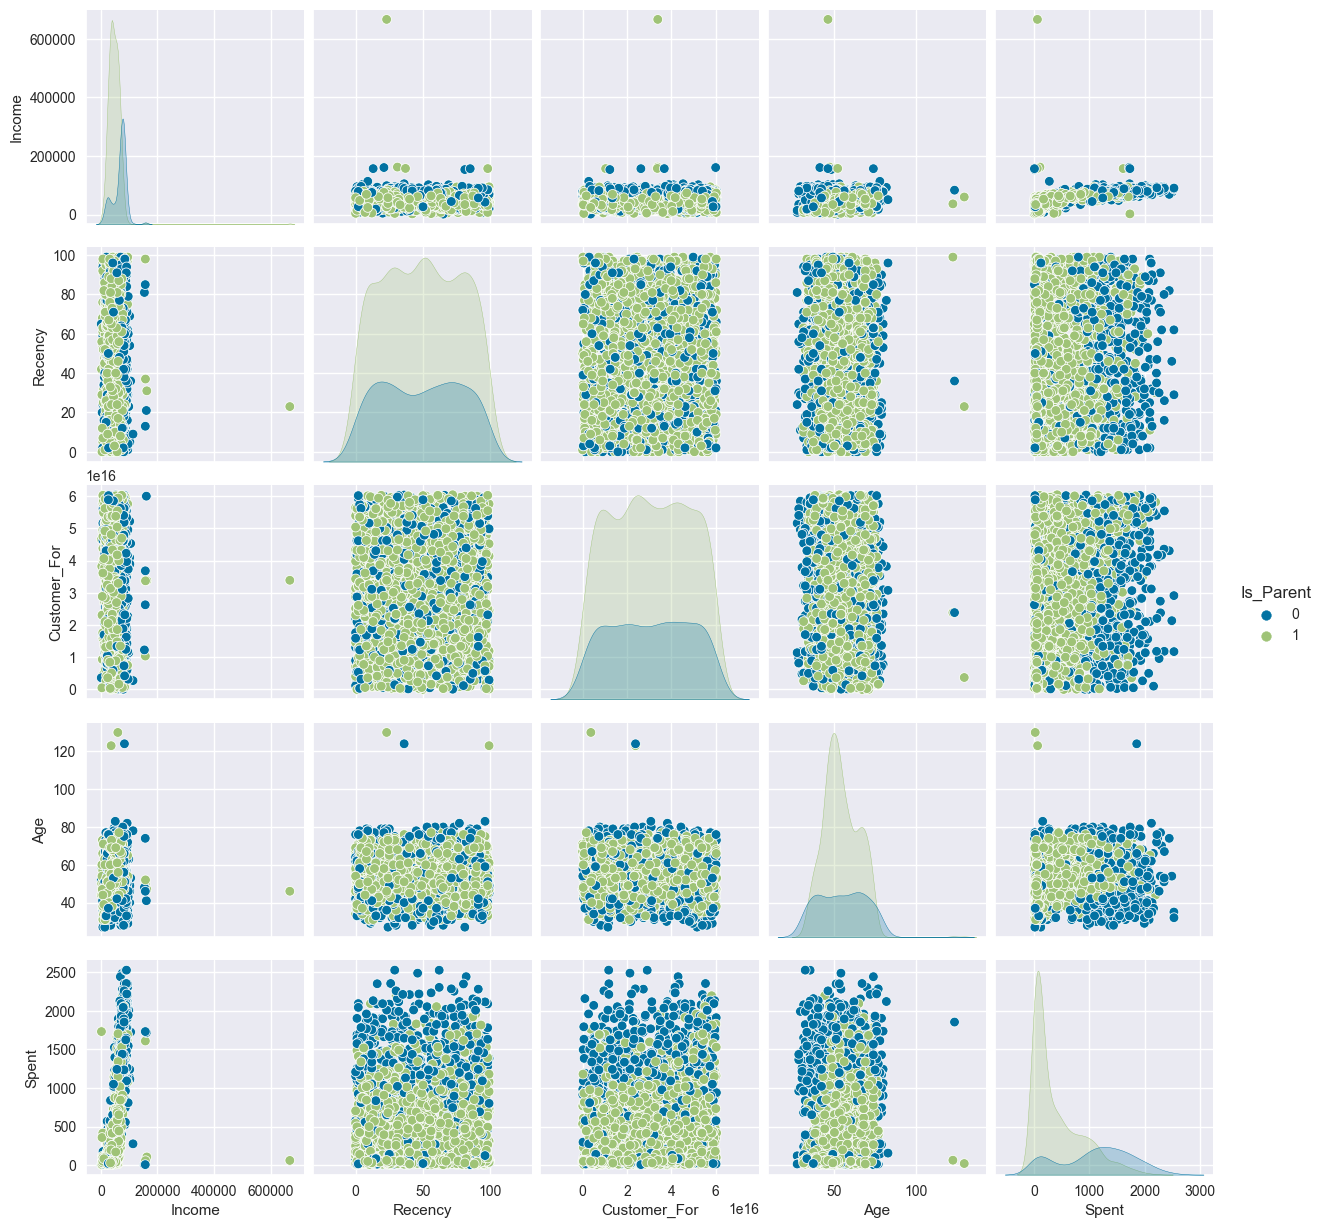

In [19]:
# 
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent")

plt.show()

### 在收入和年龄特征中存在一些异常值

In [20]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

## 2.4 相关性分析

<Axes: >

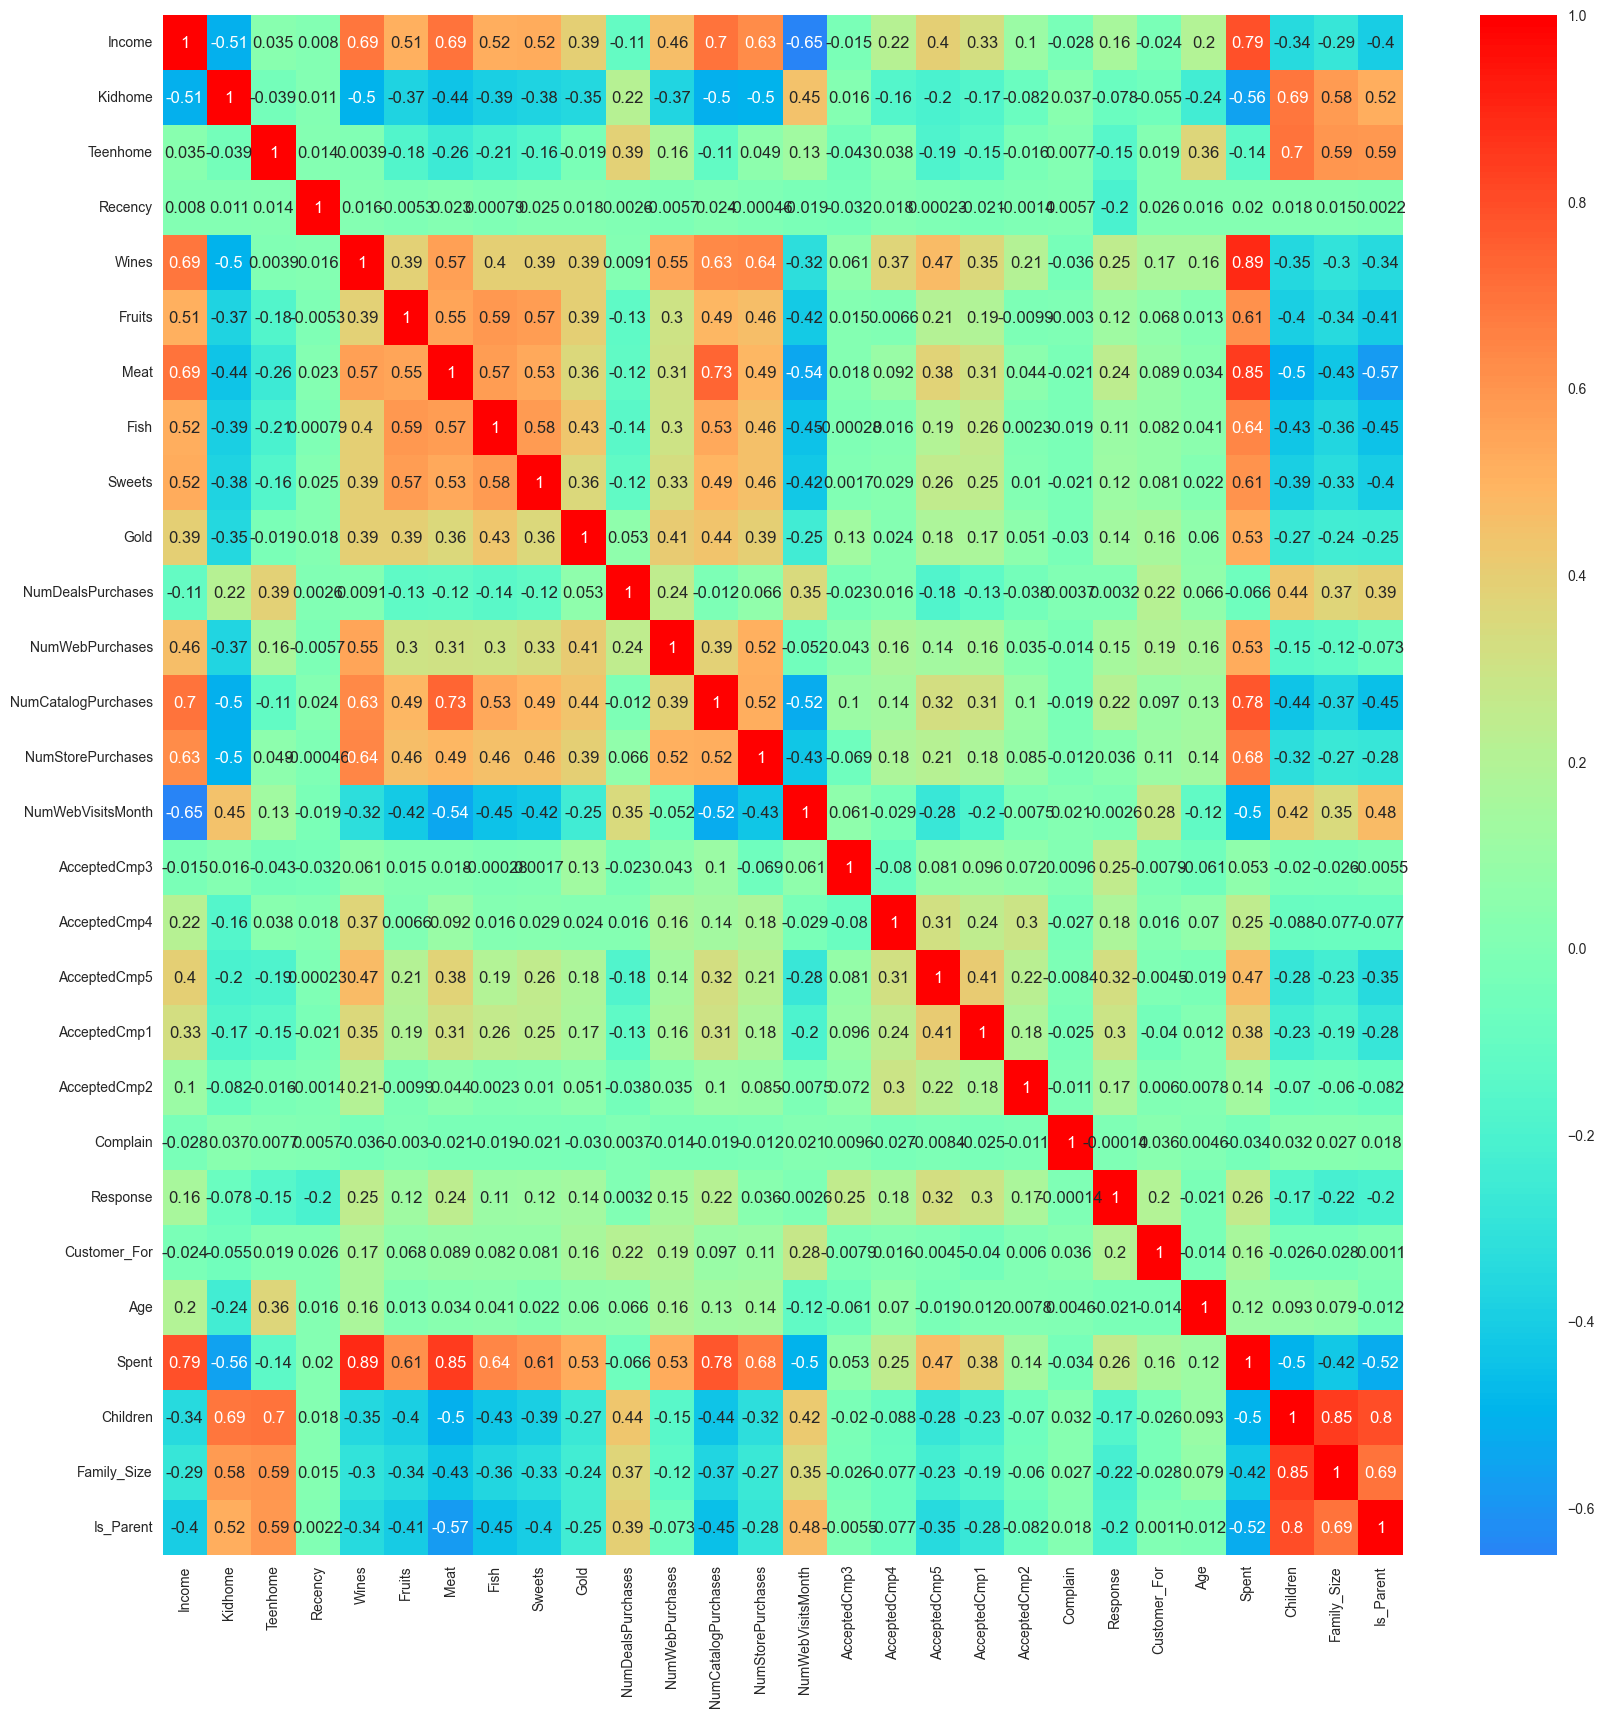

In [21]:
plt.figure(figsize=(20,20))  

data_num = data.select_dtypes(np.number)

sns.heatmap(data_num.corr(), annot=True, cmap='rainbow', center=0)

# 3. 数据预处理

In [22]:
object_cols = data.select_dtypes('object').columns.tolist()

## 3.1 Label Encoding

In [23]:
# 对对象类型列进行标签编码
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

## 3.2 Features scaling

In [24]:
# 删除Promotion促销相关列
data2 = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data2 = data2.drop(cols_del, axis=1)

# 使用 StandardScaler 进行标准化处理，将数据转换为均值为 0、标准差为 1 的形式
scaler = StandardScaler()
scaler.fit(data2)
scaled_data2 = pd.DataFrame(scaler.transform(data2),columns= data2.columns )

In [25]:
# further modelling
scaled_data2.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


## 3.3 降维 PCA主成分分析
通过获得一组主变量来减少所考虑的随机变量数量

In [26]:
# 将原始数据进行降维，将特征的维度从原始数据的列数降低为3
pca = PCA(n_components=3)
pca.fit(scaled_data2)
PCA_ds = pd.DataFrame(pca.transform(scaled_data2), columns=(["col1","col2", "col3"]))

# 对降维后的数据框进行统计分析
PCA_ds.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,6.424437e-18,6.424437e-18,6.585048e-17
std,2.878602e+00,1.709469e+00,1.231686e+00
min,-5.978125e+00,-4.194731e+00,-3.625625e+00
25%,-2.539470e+00,-1.323905e+00,-8.535705e-01
50%,-7.815950e-01,-1.737338e-01,-5.125825e-02
75%,2.386380e+00,1.234797e+00,8.647958e-01
max,7.452914e+00,6.168118e+00,6.753681e+00


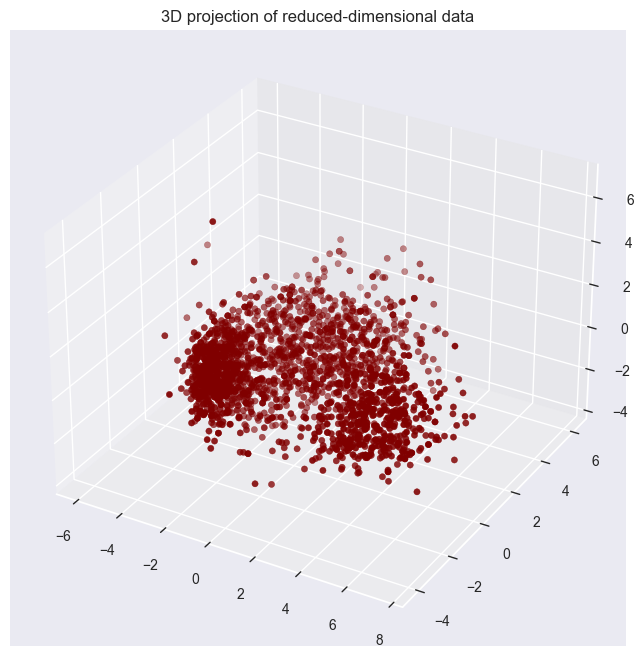

In [27]:
# 将降维后的数据在三个维度上进行可视化，并使用 3D 散点图展示数据在降维后的空间中的分布情况
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("3D projection of reduced-dimensional data")
plt.show()

## 3.4 Agglomerative clustering

Elbow Method to determine the number of clusters to be formed:


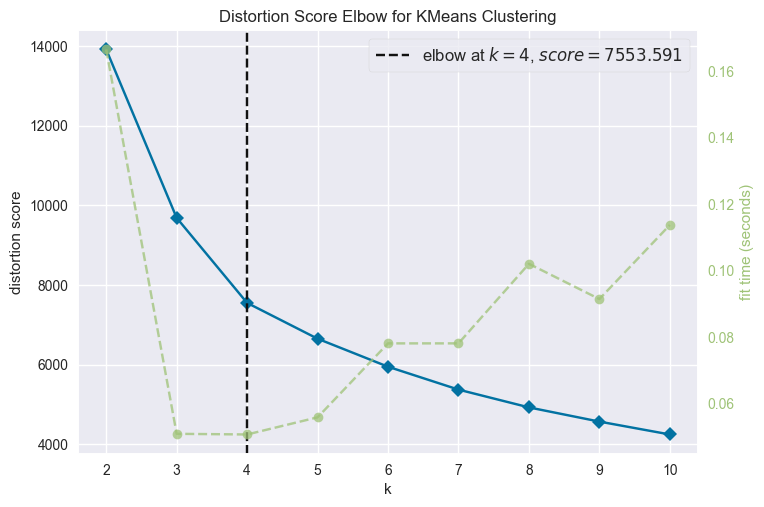

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# 确定应该形成的聚类数目
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### 4个聚类数量为最佳

In [29]:
# Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# 拟合和预测，得到每个样本点的聚类标签
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# 将聚类标签（yhat_AC）添加到原始数据集中，以便后续分析和可视化
data["Clusters"]= yhat_AC

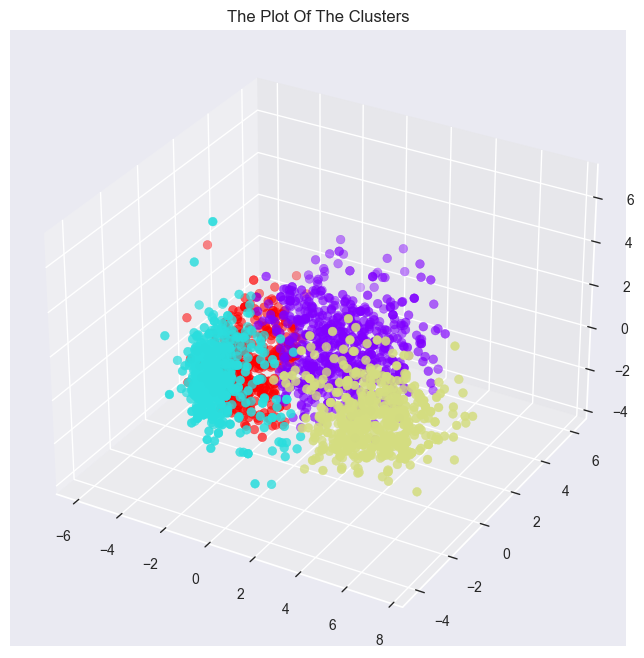

In [33]:
# 聚类可视化
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'rainbow' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# 4. 研究形成的聚类中的模式，并确定聚类模式的性质

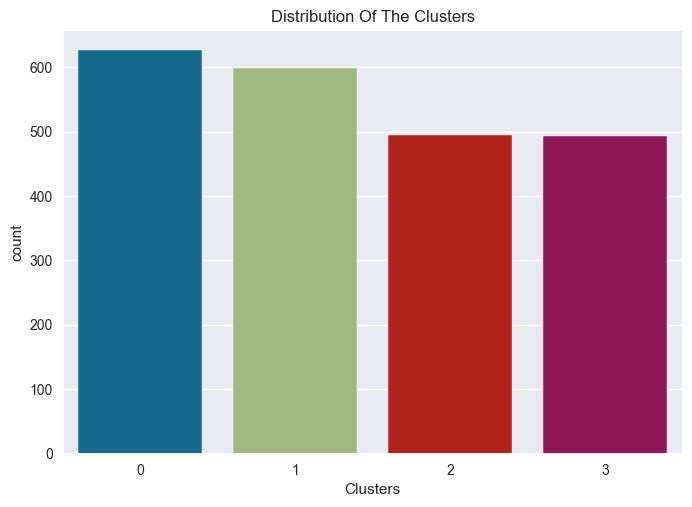

In [34]:
# 绘制聚类结果的分布情况图
pl = sns.countplot(x=data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

## 4.1 收入和消费

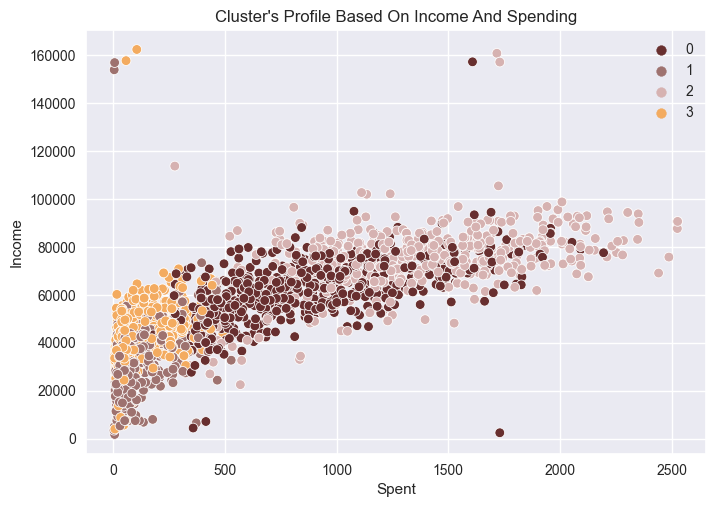

In [39]:
pal = ["#682F2F", "#9E726F", "#D6B2B1", "#F3AB60"]

pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### 收入与支出的关系图显示了群组模式

第0组：低消费和高收入  
第1组：低消费和低收入  
第2组：高消费和高收入  
第3组：低消费和高收入  

## 4.2 产品

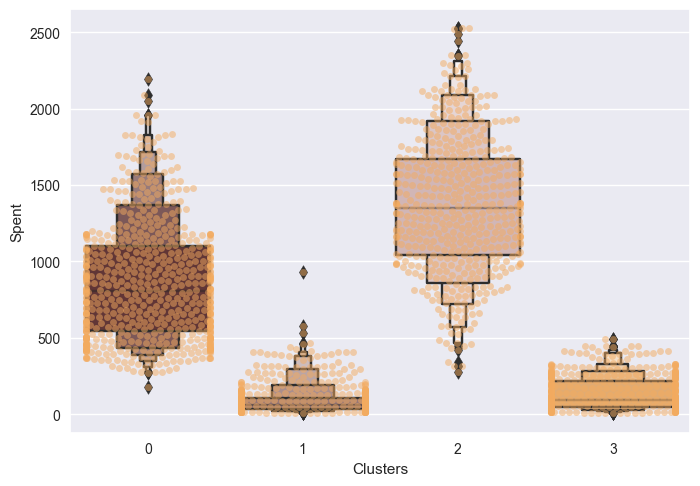

In [41]:
plt.figure()

# swarmplot函数绘制蜂群图，显示不同聚类组的支出值分布
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color='#F3AB60', alpha=0.5 )

# boxenplot函数绘制箱线图，显示每个聚类组的支出值的统计信息
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)

plt.show()

### 集群2是我们最大的一组客户，然后是集群0

## 4.3 活动

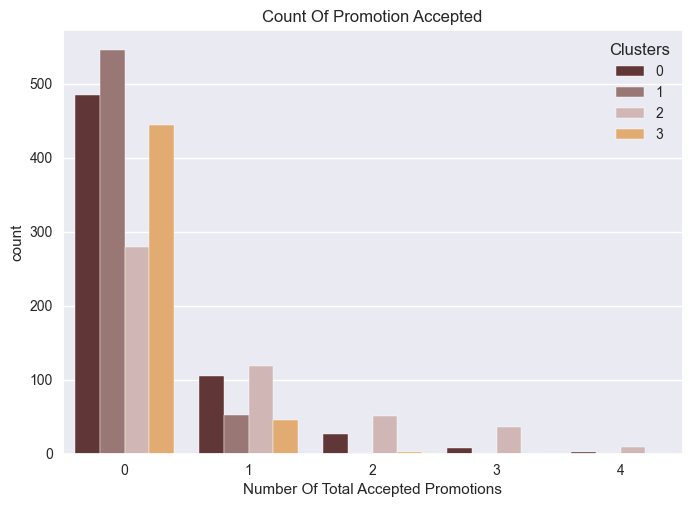

In [42]:
# 促销活动的总和
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

#可视化
plt.figure()

pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")

plt.show()

### 活动：
1. 绝大部分人都没有参与活动
2. 少部分人参与了一次，没有人参加所有5个活动
3. 活动需要优化、改进来促进销售

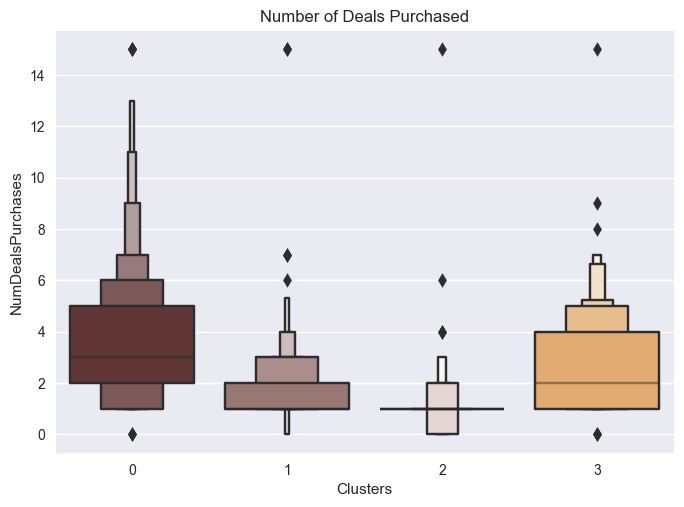

In [43]:
# 使用折扣购买的数量
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

### 使用折扣购买的数量
1. 0和3组都不错
2. 2组交易量最少

## 4.4 客户特征分析

<Figure size 800x550 with 0 Axes>

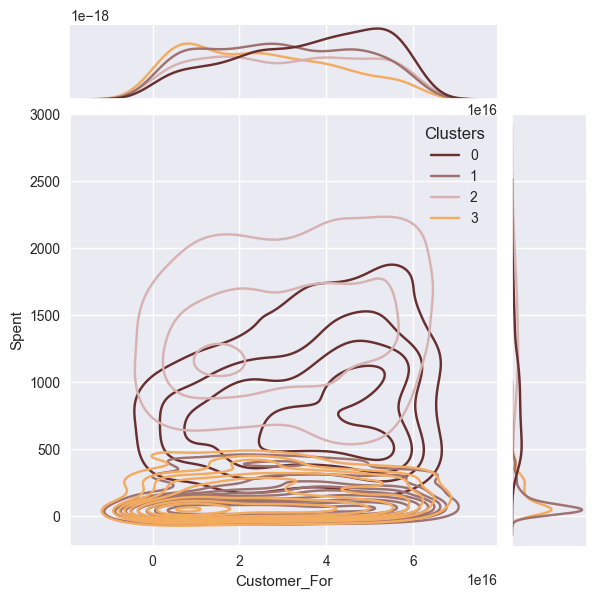

<Figure size 800x550 with 0 Axes>

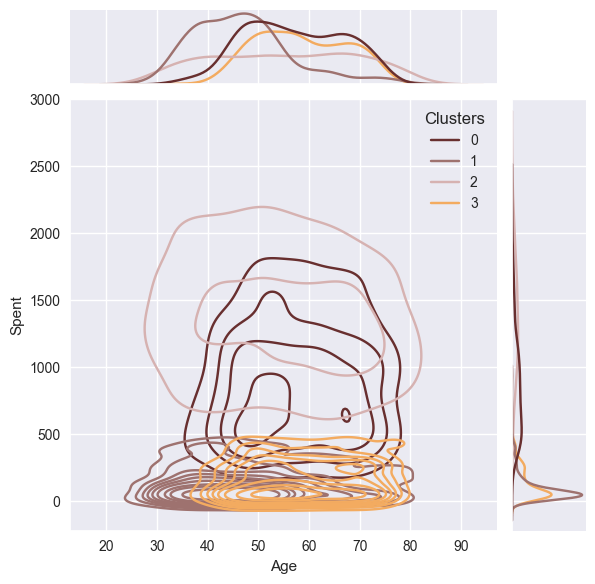

<Figure size 800x550 with 0 Axes>

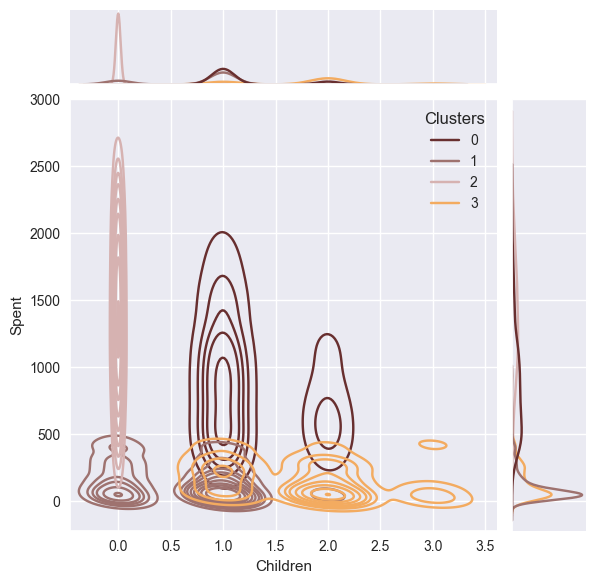

<Figure size 800x550 with 0 Axes>

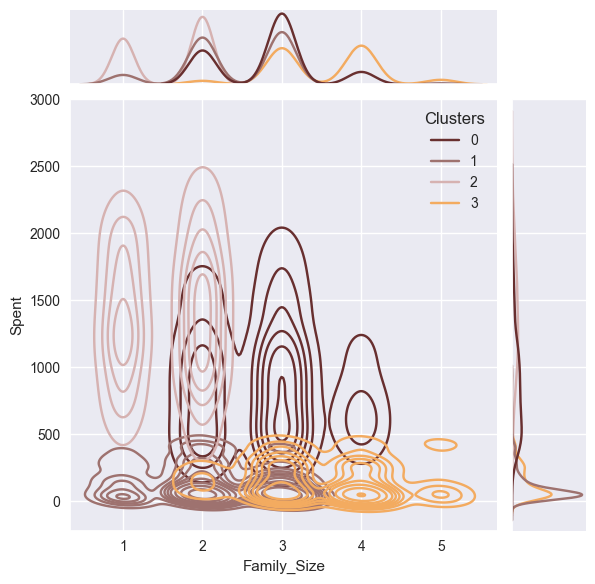

<Figure size 800x550 with 0 Axes>

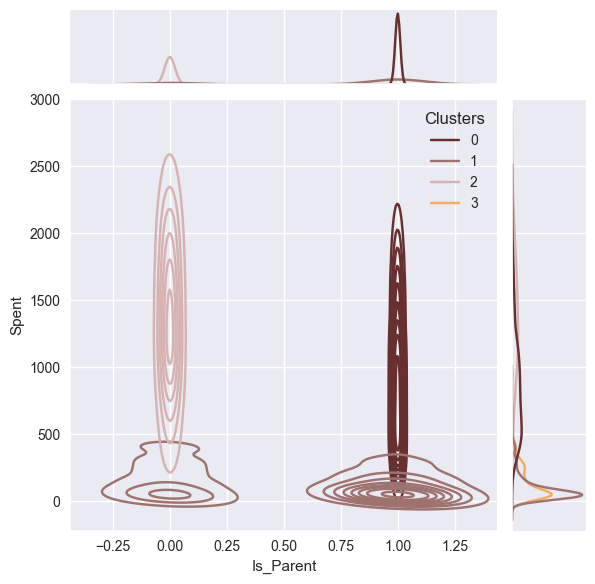

<Figure size 800x550 with 0 Axes>

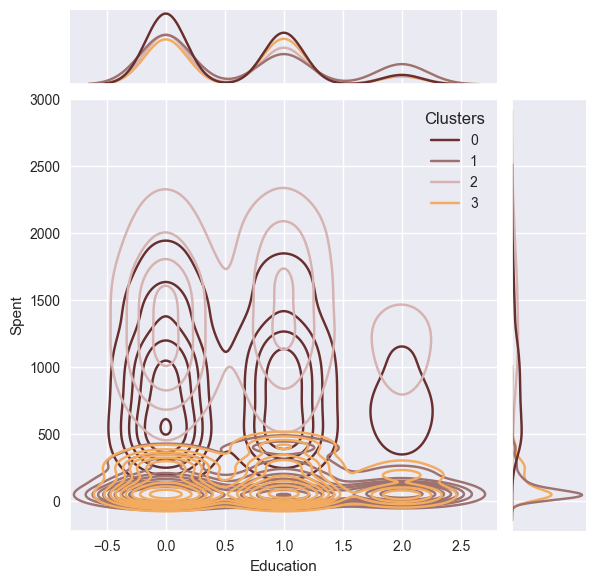

<Figure size 800x550 with 0 Axes>

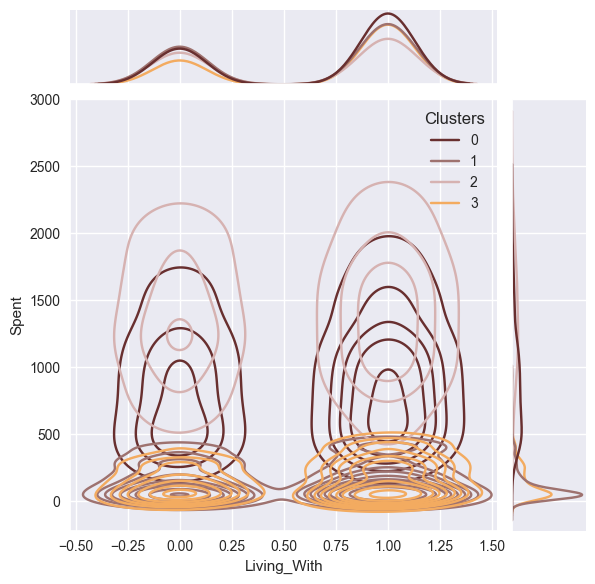

In [45]:
Personal = [ "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

### 客户特征
1. 群组编号：O
    - 是一个绝对的家长
    - 在家庭中最多有4个成员，至少有2个成员  
    - 单亲父母是这个群体的一个子集  
    - 大多数人家里有一个青少年  
    - 年龄相对较大  
2. 群组编号：l
    - 绝对不是父母
    - 家庭中最多只有2个成员 夫妇略多于单身者
    - 跨越所有年龄段
    - 一个高收入群体  
3. 群组号码：2
    - 这些人中大多数是父母
    - 家庭中最多有3个成员
    - 他们主要有一个孩子（而且通常不是青少年）。
    - 相对较年轻  
4. 群组号码：3
    - 他们绝对是父母
    - 家庭中最多有5名成员，至少有2名成员
    - 他们中的大多数人家里有一个青少年
    - 无监督聚类
    - 年龄相对较大
    - 收入较低的群体

# 项目总结
1. 在这个项目中，先进行了数据的清洗和预处理，进行了特征转换和标准化处理
2. 我进行了无监督的聚类 
3. 我使用了降维
4. 得出了4个聚类，
5. 根据聚类，根据客户的家庭结构和收入/消费情况，进一步分析
6. 这可以用于规划更好的营销策略。